In [1]:
from trueskill_manager import TrueskillManager
from dumper import Dumper
from bipedal_walker_wrapper import BipedalWalkerAgent
from database_utils import DatabaseManager

from matplotlib import pyplot as plt

NUMBER_OF_LEVELS = 3
save_plots = False
####################################################################
# model tuple = (environment_trained_on, model_id, expected_level)
####################################################################

models = [('easy', 320000, 0), ('easy', 330000, 0), ('easy', 340000, 0), 
         ('medium', 220000, 1), ('medium', 240000, 1), ('medium', 280000, 1),
         ('hard', 1060000, 2), ('hard', 1310000, 2), ('hard', 1550000, 2)]

agent = BipedalWalkerAgent()
dumper = Dumper()
db_manager = DatabaseManager()

def set_env(agent, level_id):
    if level_id == 0:
        agent.set_environment_type(super_easy=True)
    elif level_id == 1:
        agent.set_environment_type()
    elif level_id == 2:
        agent.set_environment_type(hardcore=True)
    else:
        print('Unkonwn level type')
        
def remove_model_from_db(model_id):
    model = models[model_id]
    db_manager.remove_player(model[0], str(model[1]))

def plot_(title, data):
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (15, 5) # (w, h)
    
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    a1 = ax.plot(data[0])
    a2 = ax.plot(data[1])
    a3 = ax.plot(data[2])
    a4 = ax.plot(data[3])

    plt.legend((a1[0], a2[0], a3[0], a4[0]), ('Easy', 'Medium', 'Hard', 'Player'))
    
    if save_plots:
        fig.savefig(title + '.png', bbox_inches='tight')
    
    plt.show()

In [2]:
def validate_trueskill(model, n_games, verbose=False):
    agent.set_model_difficulty(model[0])
    agent.load_model(model[1])
    t_manager = TrueskillManager(model[0], str(model[1]))

    data_to_plot = []
    for i in range(4):
        data_to_plot.append([])
    

    for i in range(n_games):
        level_id = t_manager.choose_opponent()
        
        set_env(agent, level_id)
        outcome, reward = agent.play(render=False)
        if verbose:
            print('Chosen level: {}'.format(level_id))
            print('Outcome: {} \t Reward: {}'.format(outcome, reward))
        t_manager.handle_game_outcome(outcome)
        out = dumper.dump(model[0], str(model[1]), verbose=False)
        for i in range(len(out)):
            data_to_plot[i].append(out[i][3])
            
    print('Expected level: {}\nChosen level:{}'.format(model[2], t_manager.choose_opponent()))
    return data_to_plot
    


In [3]:
plot_list = []
for model in models:
    plot_list.append(validate_trueskill(model, 10))
%store plot_list

INFO:tensorflow:Restoring parameters from ./models/easy/model-320000.ckpt
Expected level: 0
Chosen level:1
INFO:tensorflow:Restoring parameters from ./models/easy/model-330000.ckpt
Expected level: 0
Chosen level:0
INFO:tensorflow:Restoring parameters from ./models/easy/model-340000.ckpt
Expected level: 0
Chosen level:0
INFO:tensorflow:Restoring parameters from ./models/medium/model-220000.ckpt
Expected level: 1
Chosen level:1
INFO:tensorflow:Restoring parameters from ./models/medium/model-240000.ckpt
Expected level: 1
Chosen level:2
INFO:tensorflow:Restoring parameters from ./models/medium/model-280000.ckpt
Expected level: 1
Chosen level:1
INFO:tensorflow:Restoring parameters from ./models/hard/model-1060000.ckpt
Expected level: 2
Chosen level:2
INFO:tensorflow:Restoring parameters from ./models/hard/model-1310000.ckpt
Expected level: 2
Chosen level:2
INFO:tensorflow:Restoring parameters from ./models/hard/model-1550000.ckpt
Expected level: 2
Chosen level:2


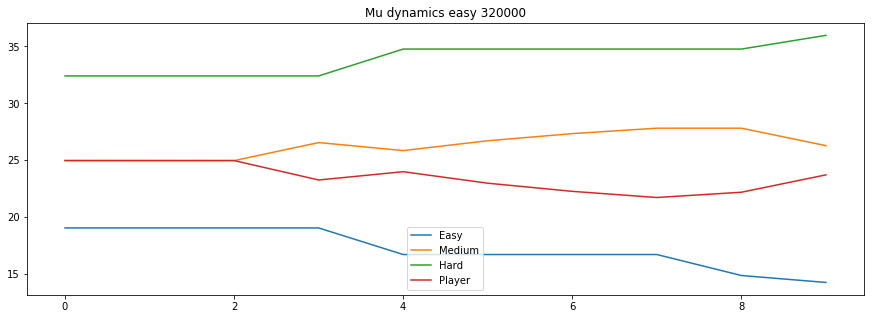

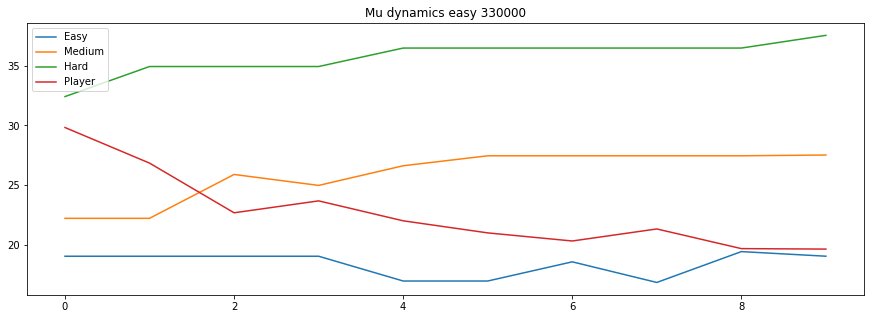

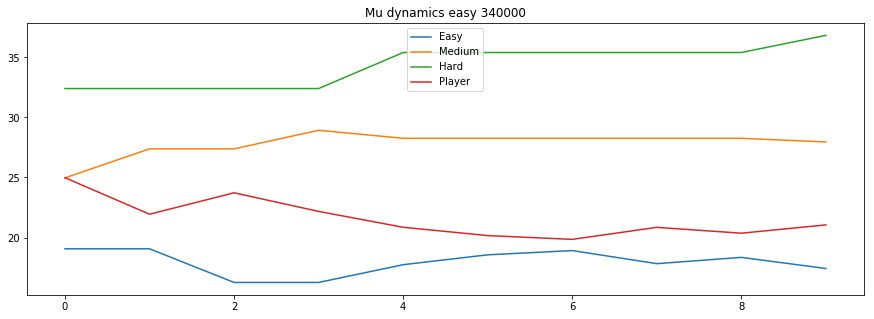

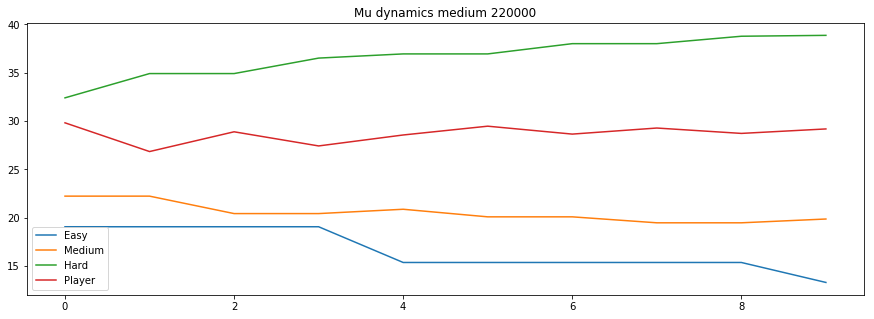

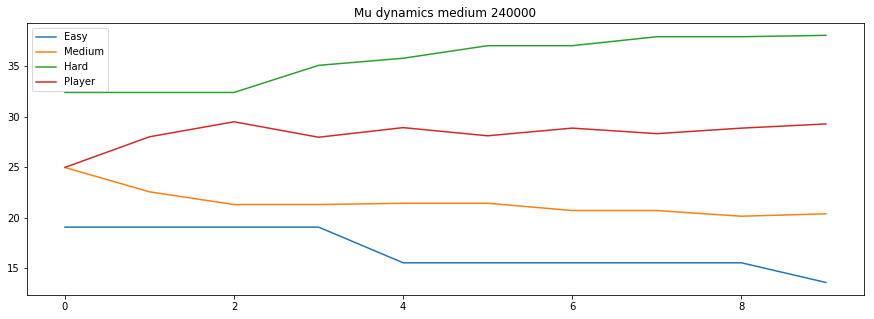

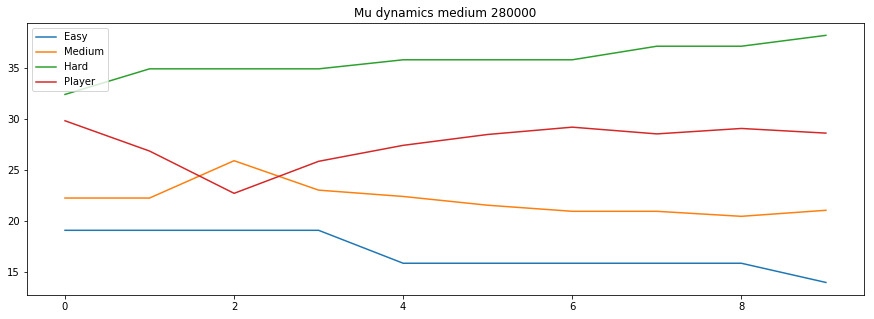

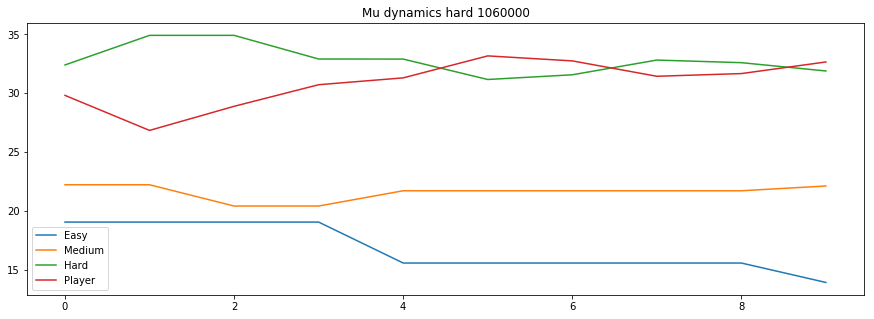

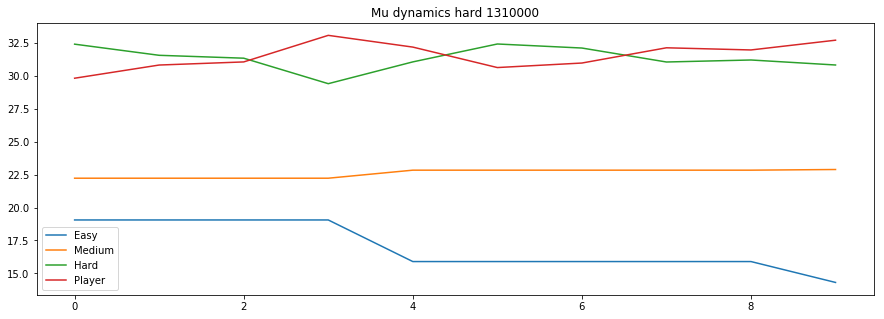

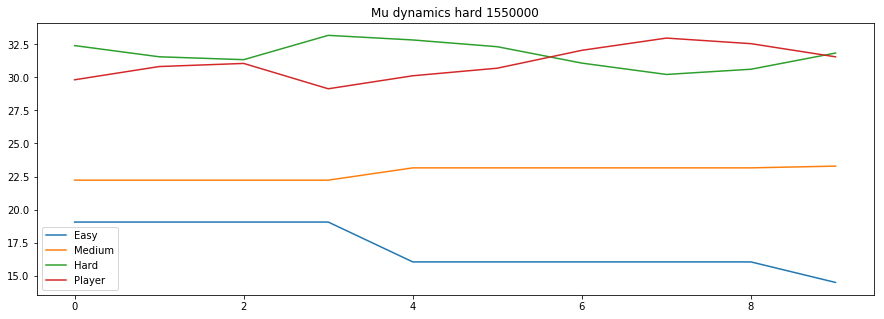

In [4]:
for i in range(len(plot_list)):
    title = 'Mu dynamics' + ' ' + models[i][0] + ' ' + str(models[i][1])
    plot_(title, plot_list[i])


In [3]:
out = validate_trueskill(models[0], 10, verbose=True)

INFO:tensorflow:Restoring parameters from ./models/easy/model-320000.ckpt
Chosen level: 1
Outcome: 1 	 Reward: 287.34429520264393
Chosen level: 2
Outcome: -1 	 Reward: -94.48234292213371
Chosen level: 1
Outcome: 0 	 Reward: 28.81286211238239
Chosen level: 1
Outcome: 0 	 Reward: 75.1684812542513
Chosen level: 1
Outcome: -1 	 Reward: -51.140189464733886
Chosen level: 1
Outcome: 0 	 Reward: 26.049526919253807
Chosen level: 1
Outcome: 0 	 Reward: 10.124231985888827
Chosen level: 1
Outcome: -1 	 Reward: -8.74765828506527
Chosen level: 1
Outcome: 0 	 Reward: 174.08467078945017
Chosen level: 1
Outcome: -1 	 Reward: -70.88588623769388
Expected level: 0
Chosen level:1


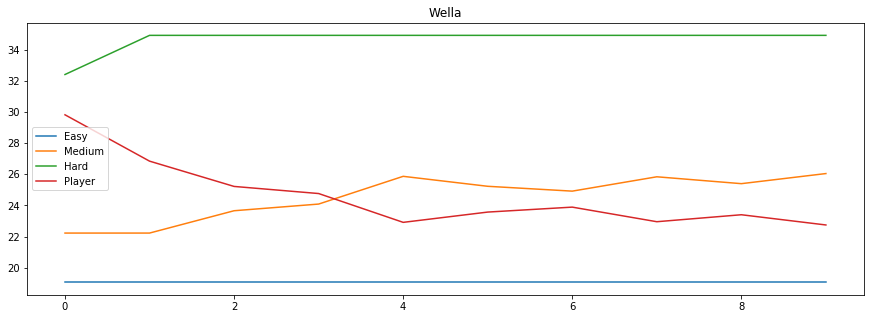

In [4]:
plot_('Wella', out)

In [5]:
remove_model_from_db(0)

1

In [5]:
dumper.dump()

#########################
easy 320000
	mu:25.101161821069674
	sigma:2.3292705702315937
	games_played:10
level:0
    mu:19.05846666789949
    sigma:6.543361811228571
level:1
    mu:25.082893313449777
    sigma:2.3041620057513064
level:2
    mu:32.404689484309614
    sigma:6.320922260422902
#########################


In [6]:
out = validate_trueskill(models[8], 10, verbose=True)

INFO:tensorflow:Restoring parameters from ./models/hard/model-1550000.ckpt
Chosen level: 1
Outcome: 1 	 Reward: 278.49244255530203
Chosen level: 2
Outcome: -1 	 Reward: -93.55882400775995
Chosen level: 2
Outcome: 1 	 Reward: 272.1823683983231
Chosen level: 2
Outcome: 1 	 Reward: 269.1870506005488
Chosen level: 2
Outcome: -1 	 Reward: -24.021423305644362
Chosen level: 2
Outcome: 1 	 Reward: 262.03692839941056
Chosen level: 2
Outcome: -1 	 Reward: -112.92082085387358
Chosen level: 2
Outcome: -1 	 Reward: -79.70990480183437
Chosen level: 2
Outcome: 0 	 Reward: 31.729802392839815
Chosen level: 2
Outcome: 1 	 Reward: 255.61531181041497
Expected level: 2
Chosen level:2


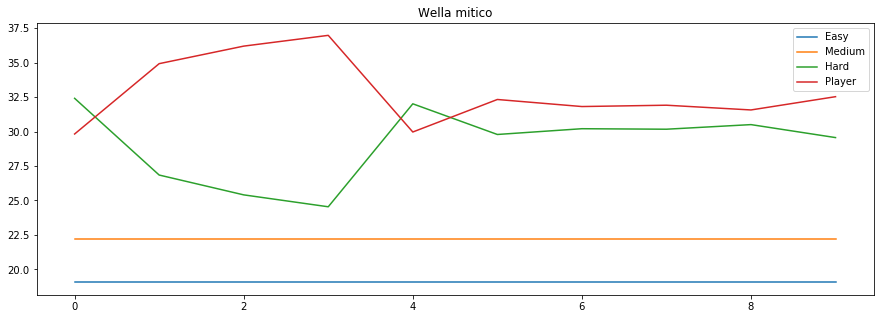

In [7]:
plot_('Wella mitico', out)

INFO:tensorflow:Restoring parameters from ./models/medium/model-220000.ckpt
Chosen level: 1
Outcome: 1 	 Reward: 291.4680772240222
Chosen level: 2
Outcome: -1 	 Reward: -94.307222103336
Chosen level: 2
Outcome: -1 	 Reward: -80.5810208774656
Chosen level: 2
Outcome: -1 	 Reward: -63.744806119917875
Chosen level: 2
Outcome: -1 	 Reward: -76.30968309765186
Chosen level: 2
Outcome: 0 	 Reward: 7.575417630313467
Chosen level: 2
Outcome: -1 	 Reward: -59.45105426602935
Chosen level: 2
Outcome: -1 	 Reward: -91.65778998120315
Chosen level: 2
Outcome: -1 	 Reward: -80.92277038294202
Chosen level: 2
Outcome: -1 	 Reward: -67.94963665622616
Expected level: 1
Chosen level:2


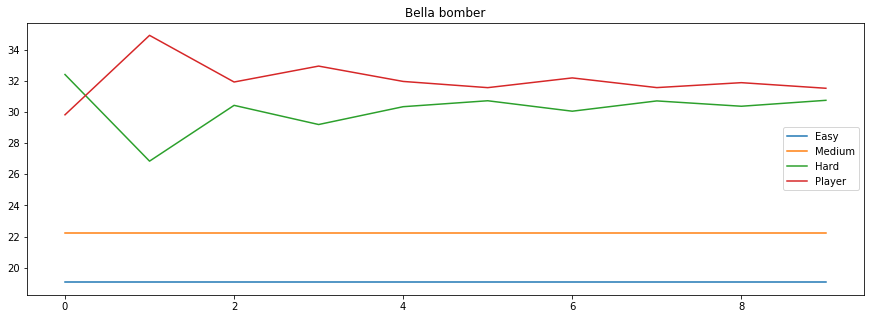

In [8]:
out = validate_trueskill(models[3], 10, verbose=True)
plot_('Bella bomber', out)

In [5]:
%store plot_list

Stored 'plot_list' (list)
